In [3]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve, precision_recall_curve, f1_score, auc
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Data exploration and cleaning

Quick note of some ideas:
- There are too many countries. Maybe just replace with a continent feature instead? Or with the countries gdp?
- Occupation is present as well. Wouldnt that have an almost direct correlation with salary?

Start with adult.data. The same transforms will apply to adult.test

In [ ]:
# We cant always reliably get the path the ipynb is in, so cwd is the hacky workaround
cwd = Path().absolute()
DATA_DIR = cwd / "data"
DATA_PATH = DATA_DIR / "adult.data"
TEST_PATH = DATA_DIR / "adult.test"

In [5]:
adult_data = pd.read_csv(DATA_PATH, names=[
    "age", "workclass", "fnlwgt", "education",
    "education-num", "marital-status", "occupation",
    "relationship", "race", "sex", "capital-gain",
    "capital-loss", "hours-per-week", "native-country",
    "salary"
])

adult_test = pd.read_csv(TEST_PATH, names=[
    "age", "workclass", "fnlwgt", "education",
    "education-num", "marital-status", "occupation",
    "relationship", "race", "sex", "capital-gain",
    "capital-loss", "hours-per-week", "native-country",
    "salary"
])

# Drop first row of adult_test
# adult_test.drop(labels=0, axis=0, inplace=True)

FileNotFoundError: [Errno 2] No such file or directory: 'F:\\Libraries\\Documents\\ALL\\School\\Masters\\Courses\\COEN6321_evolutionary_computing\\Assignments\\asg2\\AdultCensusPrediction\\notebooks\\data\\adult.data'

In [ ]:
adult_data.head()

In [ ]:
adult_data.info()

In [ ]:
adult_test.info()

In [ ]:
adult_data["salary"].hist()

In [ ]:
adult_test["salary"].hist()

**Age**

Check for missing values (denoted as ? in dataset)

In [ ]:
adult_data.loc[adult_data["age"] == '?'].count().sum()

In [ ]:
adult_test.loc[adult_data["age"] == '?'].count().sum()

In [ ]:
# Cast adult_test age to int64
adult_test["age"] = adult_test["age"].astype(np.int64) 

**workclass**

In [ ]:
adult_data["workclass"].unique()

In [ ]:
adult_data["workclass"].value_counts()

In [ ]:
adult_test["workclass"].value_counts()

I think we have more than enough data to be able to drop all ? classes

In [ ]:
adult_data[adult_data["workclass"].str.contains('\?')]["salary"].hist()

The distribution of the rows we want to remove are similar to the distr of the pop as a whole (in terms of labels) so it should be ok.

In [ ]:
adult_test[adult_test["workclass"].str.contains('\?')]["salary"].hist()

**fnlweight**

Description of fnlweight:  

Description of fnlwgt (final weight)  
<br>
The weights on the CPS files are controlled to independent estimates of the  
civilian noninstitutional population of the US.  These are prepared monthly  
for us by Population Division here at the Census Bureau.  We use 3 sets of
controls.  
<br>
These are:  
         1.  A single cell estimate of the population 16+ for each state.  
         2.  Controls for Hispanic Origin by age and sex.  
         3.  Controls by Race, age and sex.  
We use all three sets of controls in our weighting program and "rake" through  
them 6 times so that by the end we come back to all the controls we used.  
<br>
The term estimate refers to population totals derived from CPS by creating  
"weighted tallies" of any specified socio-economic characteristics of the  
population.  
<br>
People with similar demographic characteristics should have  
similar weights.  There is one important caveat to remember  
about this statement.  That is that since the CPS sample is  
actually a collection of 51 state samples, each with its own  
probability of selection, the statement only applies within  
state.  


*So we need to figure out a way to only consider fnweight on state by state basis. Maybe standardize per state?*

In [ ]:
# adult_test has fnlweight as float instead of int, we need to change that
adult_test["fnlwgt"] = adult_test["fnlwgt"].astype(np.int64)

In [ ]:
adult_data["fnlwgt"].isna().sum()

In [ ]:
adult_test["fnlwgt"].isna().sum()

In [ ]:
adult_data["fnlwgt"].hist(bins=100)

In [ ]:
adult_test["fnlwgt"].hist(bins=100)

**education**

In [ ]:
adult_data["education"].value_counts()

In [ ]:
adult_data["education"].isna().sum()

In [ ]:
adult_test["education"].value_counts()

In [ ]:
adult_test["education"].isna().sum()

**education_num**

In [ ]:
grouped_adult = adult_data.groupby("education-num")
for group in grouped_adult:
    print(group[0])
    print(group[1]["education"].unique())

In [ ]:
# So we can simply drop education, since education level already encodes for it

In [ ]:
grouped_adult_test = adult_test.groupby("education-num")
for group in grouped_adult:
    print(group[0])
    print(group[1]["education"].unique())

**marital-status**

If we want to perform feature reduction, we can probably do things like combining separated and married-spouse-absent or something. Though we might be losing some interesting information by doing that.

In [ ]:
adult_data["marital-status"].unique()

In [ ]:
adult_data["marital-status"].isna().sum()

In [ ]:
adult_test["marital-status"].unique()

In [ ]:
adult_test["marital-status"].isna().sum()

**occupation**

In [ ]:
adult_data["occupation"].unique()

In [ ]:
adult_data[adult_data["occupation"].str.contains('\?')]["salary"].hist()

In [ ]:
adult_test["occupation"].unique()

In [ ]:
adult_test[adult_test["occupation"].str.contains('\?')]["salary"].hist()

We can drop all the ?

**relationship**

In [ ]:
adult_data["relationship"].unique()

In [ ]:
adult_data["relationship"].value_counts()

In [ ]:
adult_test["relationship"].unique()

In [ ]:
adult_test["relationship"].value_counts()

**race**

In [ ]:
adult_data["race"].value_counts()

No need to drop ?

In [ ]:
adult_test["race"].value_counts()

**sex**

In [ ]:
adult_data["sex"].value_counts()

In [ ]:
adult_test["sex"].value_counts()

**capital-gain**

In [ ]:
adult_data["capital-gain"].isna().sum()

In [ ]:
adult_test["capital-gain"].isna().sum()

**capital-loss**

In [ ]:
adult_data["capital-loss"].isna().sum()

In [ ]:
adult_test["capital-loss"].isna().sum()

In [ ]:
adult_data["capital-loss"].describe()

In [ ]:
adult_test["capital-loss"].describe()

**hours-per-week**

In [ ]:
adult_data["hours-per-week"].isna().sum()

In [ ]:
adult_data["hours-per-week"].describe()

In [ ]:
adult_test["hours-per-week"].isna().sum()

In [ ]:
adult_test["hours-per-week"].describe()

**native-country**

In [ ]:
adult_data["native-country"].value_counts()

In [ ]:
adult_data[adult_data["native-country"].str.contains('\?')]["salary"].hist()

In [ ]:
adult_test[adult_test["native-country"].str.contains('\?')]["salary"].hist()

# Preprocessing/Cleaning

In [ ]:

def clean_adult(df):
    """
    Used to clean both the adult.data and the adult.test files.
    
    Columns must be renamed on import.
    """

    adf = df.copy()
    
    # Replace ? with np.nan
    adf.replace({"\?":np.nan}, regex=True, inplace=True)
    
    # Drop all rows with nans
    before = len(adf)
    adf.dropna(axis=0, inplace=True)
    after = len(adf)
    print("{} rows dropped due to missing data.".format(before - after))
    
    # Make sure all datatypes are properly set
    adf["age"] = adf["age"].astype(np.int64)
    adf["fnlwgt"] = adf["fnlwgt"].astype(np.int64)
    adf["education-num"] = adf["education-num"].astype(np.int64)
    adf["capital-gain"] = adf["capital-gain"].astype(np.int64)
    adf["capital-loss"] = adf["capital-loss"].astype(np.int64)
    adf["hours-per-week"] = adf["hours-per-week"].astype(np.int64)
    
    return adf


def preprocess(df, one_hot=[], to_drop=['education'], scale=[]):
    """
    Performs the relevant transforms on the data to prepare it for use with a model.
    """
    
    adf = df.copy()
    
    # Convert the labels for salary to 1 and 0
    adf["salary"].replace({"<=50K":0, ">50K":1}, regex=True, inplace=True)
    
    # Drop the education column since it is already accounted for in education-num
    if to_drop:
        adf.drop(to_drop, axis=1, inplace=True)

    # One hot encode all columns in one_hot
    for col in one_hot:
        if col in adf.columns:
            temp = pd.get_dummies(adf[col])
            adf = adf.drop(col, axis=1)
            adf = adf.join(temp)
    
    # Scale the desired columns (center values around the column mean and std)
    if scale:
        scaler = StandardScaler()
        adf[scale] = scaler.fit_transform(adf[scale])
    
    return adf

In [14]:
# We cant always reliably get the path the ipynb is in, so cwd is the hacky workaround
cwd = Path().absolute()
DATA_DIR = cwd.parent / "data"
DATA_PATH = DATA_DIR / "adult.data"
TEST_PATH = DATA_DIR / "adult.test"

In [15]:
print(DATA_DIR)

F:\Libraries\Documents\ALL\School\Masters\Courses\COEN6321_evolutionary_computing\Assignments\asg2\AdultCensusPrediction\data


In [16]:
adult_data = pd.read_csv(DATA_PATH, names=[
    "age", "workclass", "fnlwgt", "education",
    "education-num", "marital-status", "occupation",
    "relationship", "race", "sex", "capital-gain",
    "capital-loss", "hours-per-week", "native-country",
    "salary"
])

adult_test = pd.read_csv(TEST_PATH, names=[
    "age", "workclass", "fnlwgt", "education",
    "education-num", "marital-status", "occupation",
    "relationship", "race", "sex", "capital-gain",
    "capital-loss", "hours-per-week", "native-country",
    "salary"
])


In [29]:
adult_data.replace({"\?":np.nan}, regex=True, inplace=True)
adult_test.replace({"\?":np.nan}, regex=True, inplace=True)

In [30]:
na_free_d = adult_data.dropna()
only_na_d = adult_data[~adult_data.index.isin(na_free_d.index)]

In [31]:
na_free_t = adult_test.dropna()
only_na_t = adult_test[~adult_test.index.isin(na_free_t.index)]

In [32]:
na_combined = pd.concat([only_na_t, only_na_d], ignore_index=True, axis='index')

In [37]:
nafree_combined = pd.concat([na_free_t, na_free_d], ignore_index=True, axis='index')

<AxesSubplot:>

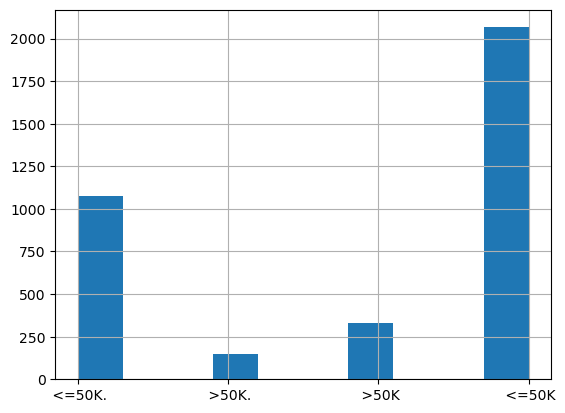

In [36]:
na_combined["salary"].hist()

<AxesSubplot:>

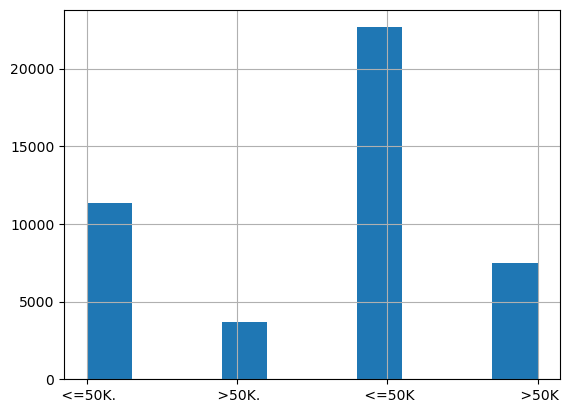

In [38]:
nafree_combined["salary"].hist()

In [41]:
nafree_combined[nafree_combined["salary"].str.contains('.')]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
4,34,Private,198693.0,10th,6.0,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,27,Private,257302.0,Assoc-acdm,12.0,Married-civ-spouse,Tech-support,Wife,White,Female,0.0,0.0,38.0,United-States,<=50K
45218,40,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
45219,58,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
45220,22,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K
